In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


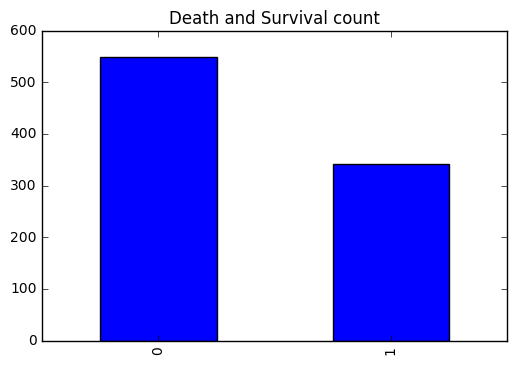

In [7]:
train_df.Survived.value_counts().plot(kind='bar',title='Death and Survival count')

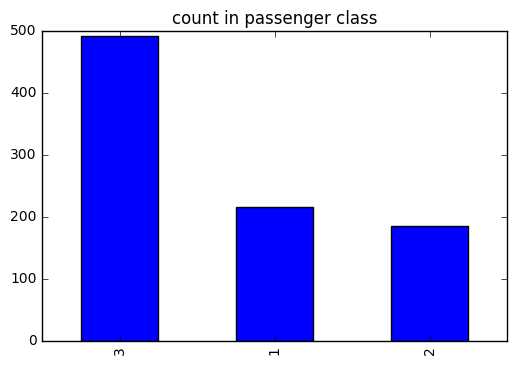

In [8]:
train_df.Pclass.value_counts().plot(kind='bar',title='count in passenger class')

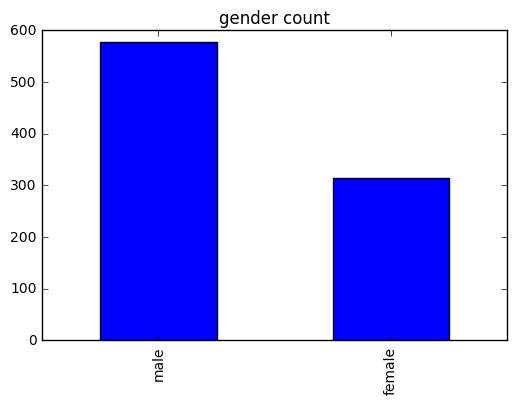

In [9]:
train_df.Sex.value_counts().plot(kind='bar',title='gender count')

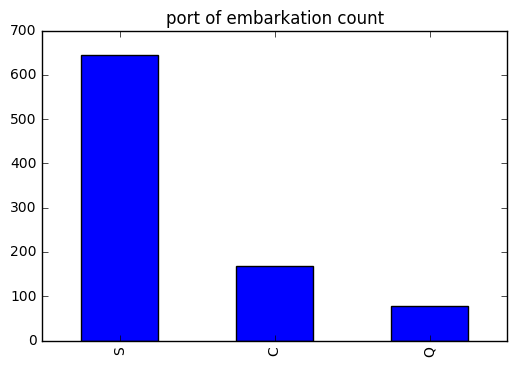

In [10]:
train_df.Embarked.value_counts().plot(kind='bar',title='port of embarkation count')

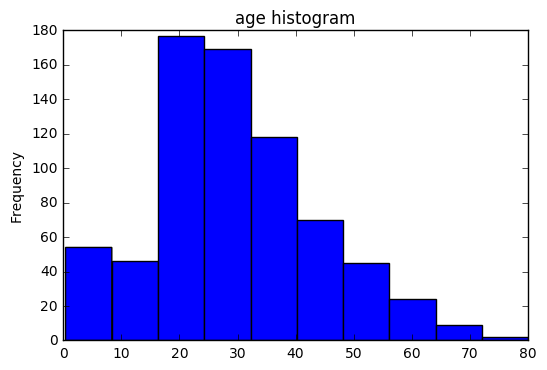

In [11]:
train_df.Age.plot.hist(bins=10,title='age histogram')

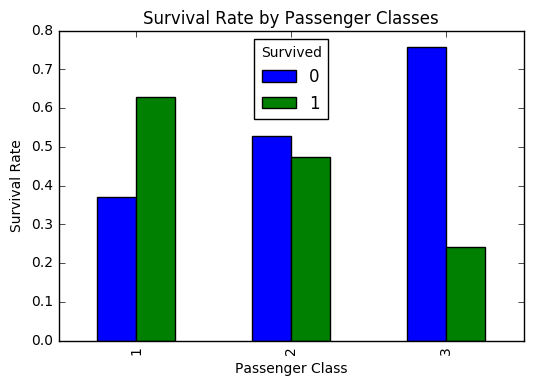

In [12]:
pclass_xt = pd.crosstab(train_df['Pclass'], train_df['Survived'])
pclass_xt

pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [13]:
train_df['Sex_val'] = train_df.Sex.map({'male':1,'female':0})

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


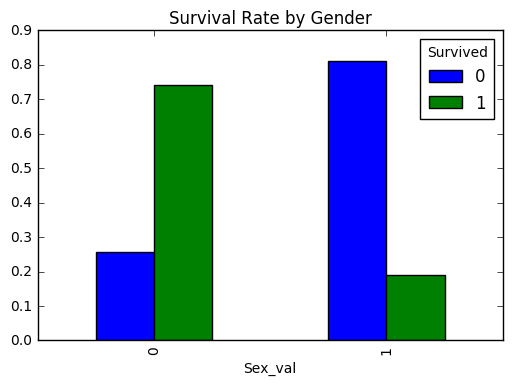

In [15]:
Sex_val_xt = pd.crosstab(train_df['Sex_val'], train_df['Survived'])
Sex_val_xt_pct = Sex_val_xt.div(Sex_val_xt.sum(1).astype(float), axis=0)
Sex_val_xt_pct.plot(kind='bar', title='Survival Rate by Gender')

In [16]:
pasenger_class = sorted(train_df.Pclass.unique())
pasenger_class

[1, 2, 3]

In [17]:
for p_class in pasenger_class:
    print ('M: ', p_class, len(train_df[(train_df.Sex == 'male') & 
                             (train_df.Pclass == p_class)]))
    print ('F: ', p_class, len(train_df[(train_df.Sex == 'female') & 
                             (train_df.Pclass == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


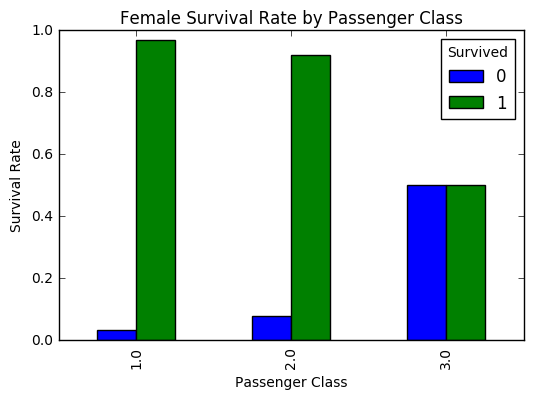

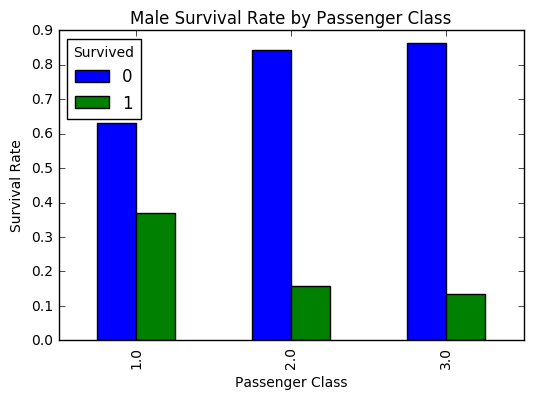

In [18]:
females_df = train_df[train_df['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], train_df['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = train_df[train_df['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], train_df['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar',   
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [19]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_val,Embarked_val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3.0


In [22]:
train_df['Embarked_val'] = train_df.Embarked.map({'C': 1, 'Q': 2, 'S': 3})
train_df[train_df.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_val,Embarked_val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,NaN


In [24]:
train_df['Embarked_val'].value_counts()

3.0    644
1.0    168
2.0     77
Name: Embarked_val, dtype: int64

In [26]:
train_df.Embarked_val.fillna(value=0,inplace=True)
train_df['Embarked_val'].value_counts()

3.0    644
1.0    168
2.0     77
0.0      2
Name: Embarked_val, dtype: int64

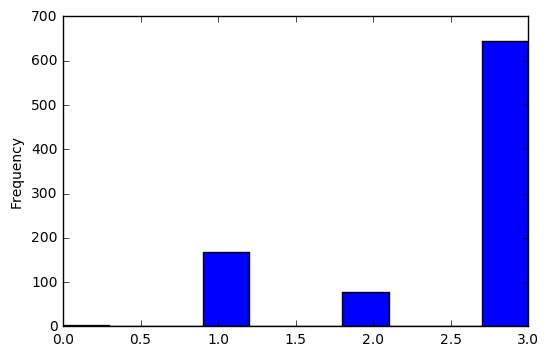

In [27]:
train_df.Embarked_val.plot.hist()

In [28]:
Embarked_xt = pd.crosstab(train_df.Embarked_val,train_df.Survived)
Embarked_xt

Survived,0,1
Embarked_val,,
0.0,0,2
1.0,75,93
2.0,47,30
3.0,427,217


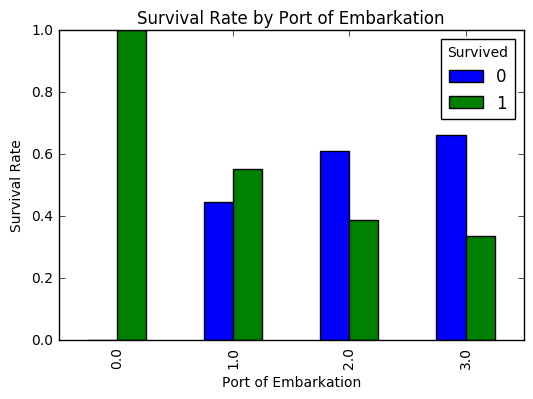

In [29]:
Embarked_xt_pct =  Embarked_xt.div(Embarked_xt.sum(1).astype(float), axis=0)
Embarked_xt_pct.plot(kind='bar')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [30]:
len(train_df[train_df['Age'].isnull()])

177

In [31]:
train_df['AgeFill'] = train_df.Age.groupby([train_df.Sex_val,train_df.Pclass]).apply(lambda x: x.fillna(x.median()))

In [32]:
len(train_df[train_df['AgeFill'].isnull()])

0

I:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
I:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
I:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
I:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


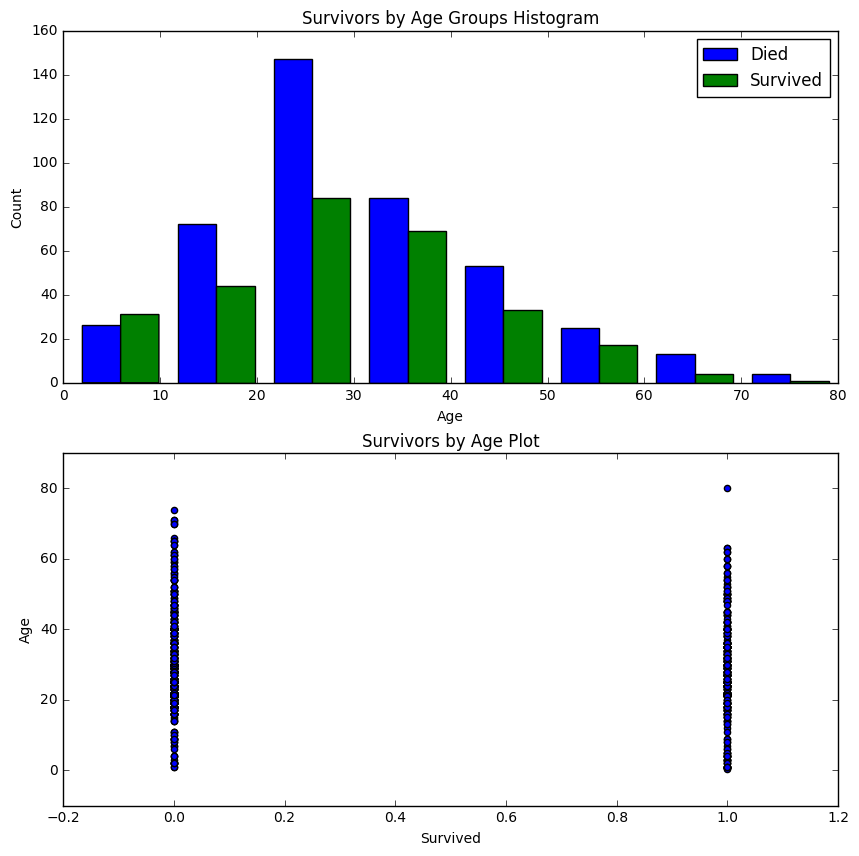

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
df1 = train_df[train_df['Survived'] == 0]['Age']
df2 = train_df[train_df['Survived'] == 1]['Age']
max_age = max(train_df['AgeFill'])
axes[0].hist([df1, df2], 
             bins=max_age / 10, 
             range=(1, max_age), 
             )
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(train_df['Survived'], train_df['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

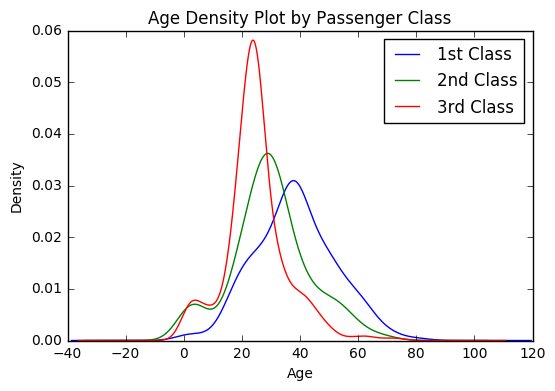

In [34]:
for pclass in pasenger_class:
    train_df.AgeFill[train_df.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

In [35]:
train_df['FamilySize'] = train_df.SibSp + train_df.Parch
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_val,Embarked_val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3.0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3.0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3.0,35.0,0


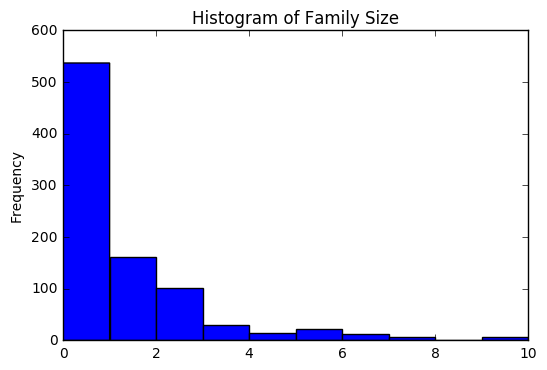

In [36]:
train_df.FamilySize.plot(kind='hist',title='Histogram of Family Size')

In [37]:
family_sizes = sorted(train_df.FamilySize.unique())
family_size_max = max(family_sizes)
print(family_sizes)
print(family_size_max)

[0, 1, 2, 3, 4, 5, 6, 7, 10]
10


In [38]:
df1 = train_df[train_df['Survived'] == 0]['FamilySize']
df2 = train_df[train_df['Survived'] == 1]['FamilySize']

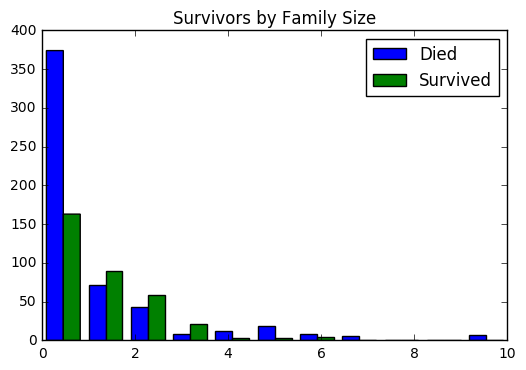

In [39]:
plt.hist([df1, df2],bins=family_size_max + 1,range=(0, family_size_max))
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

In [40]:
train_df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Age', 'SibSp', 'Parch', 'PassengerId'], 
                         axis=1)

In [41]:
train_df.head()

,Survived,Pclass,Fare,Sex_val,Embarked_val,AgeFill,FamilySize
0,0,3,7.2500,1,3.0,22.0,1
1,1,1,71.2833,0,1.0,38.0,1
2,1,3,7.9250,0,3.0,26.0,0
3,1,1,53.1000,0,3.0,35.0,1
4,0,3,8.0500,1,3.0,35.0,0


In [42]:
train_df = train_df.drop(['Fare'],axis =1)

In [43]:
train_df.head()

,Survived,Pclass,Sex_val,Embarked_val,AgeFill,FamilySize
0,0,3,1,3.0,22.0,1
1,1,1,0,1.0,38.0,1
2,1,3,0,3.0,26.0,0
3,1,1,0,3.0,35.0,1
4,0,3,1,3.0,35.0,0


In [45]:
train_df.dtypes

Survived          int64
Pclass            int64
Sex_val           int64
Embarked_val    float64
AgeFill         float64
FamilySize        int64
dtype: object

In [46]:
train_df.shape

(891, 6)

In [47]:
train_data = train_df.values
train_data

array([[  0. ,   3. ,   1. ,   3. ,  22. ,   1. ],
       [  1. ,   1. ,   0. ,   1. ,  38. ,   1. ],
       [  1. ,   3. ,   0. ,   3. ,  26. ,   0. ],
       ..., 
       [  0. ,   3. ,   0. ,   3. ,  21.5,   3. ],
       [  1. ,   1. ,   1. ,   1. ,  26. ,   0. ],
       [  0. ,   3. ,   1. ,   2. ,  32. ,   0. ]])

In [48]:
train_features = train_data[:, 1:]
train_target = train_data[:, 0]
train_features.dtype
train_target.dtype

dtype('float64')

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=1)

In [83]:
knn = knn.fit(train_features,train_target)
clf = clf.fit(train_features, train_target)
score1 = clf.score(train_features, train_target)
score2 = knn.score(train_features,train_target)
print("Mean accuracy of Random Forest: {0}".format(score1))
print("Mean accuracy of K Neighbour: {0}".format(score2))

Mean accuracy of Random Forest: 0.9326599326599326
Mean accuracy of K Neighbour: 0.9113355780022446


In [62]:
def cleandata(df):
    
    df['Sex_val'] = df.Sex.map({'male':1,'female':0})
    df['Embarked_val'] = df.Embarked.map({'C': 1, 'Q': 2, 'S': 3})
    df['Embarked_val'].fillna(value=0)
    df['AgeFill'] = df.Age.groupby([train_df.Sex_val,train_df.Pclass]).apply(lambda x: x.fillna(x.median()))
    df['FamilySize'] = df.SibSp + df.Parch
    
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Age', 'SibSp', 'Parch', 'PassengerId','Fare'],axis=1)
    
    return df

In [71]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
test_df_clean = cleandata(test_df)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_val,Embarked_val,AgeFill,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,2,34.5,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,3,47.0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,2,62.0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,3,27.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3,22.0,2


In [73]:
test_x = test_df_clean.values

In [74]:
test_y = clf.predict(test_x)

In [75]:
test_y

array([ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [76]:
test_df['Survived'] = test_y
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_val,Embarked_val,AgeFill,FamilySize,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,2,34.5,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,3,47.0,1,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,2,62.0,0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,3,27.0,0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3,22.0,2,1.0


In [78]:
test_df[['PassengerId', 'Survived']] \
    .to_csv('results_titanic.csv', index=False)

In [79]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 5) (891,)
(712, 5) (712,)
(179, 5) (179,)


I:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.83
